# Classify dogs via features detected on VGG

In [2]:
import keras
from keras import applications

import matplotlib.pylab as plt
%matplotlib inline

import random
import time

random.seed(time.time())

Using TensorFlow backend.


In [3]:
# load trained vgg 16
pretrained_vgg_16 = applications.VGG16(weights='imagenet', include_top = True)

In [4]:
from keras.models import Model

# found with pretrained_vgg_16.layers[-2].get_config()
layer_name = 'fc2'

# get penultimate activation layer (relu activation layer)
intermediate_layer_model = Model(inputs = pretrained_vgg_16.input, outputs = pretrained_vgg_16.get_layer(layer_name).output)

In [5]:
import os

# create list of all the image paths to add to the database
folder = "/Users/l1nda/documents/tavtech/week-2/dog-breeds/train"
image_list = []

folder_list = os.listdir(folder)
for image_name in folder_list:
    image_path = os.path.join(folder, image_name)
    image_list.append(image_path)

In [6]:
import cv2

feature_list = []
images_database = []

for image in image_list:
    # read image
    image = cv2.imread(image)
    # convert from bgr to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # add image to image list
    images_database.append(image)
    # resize for VGG
    image = cv2.resize(image, (224, 224))
    
    # add dummy dimension
    image = image[None]
    # extract feature vec for each image
    feature_vec = intermediate_layer_model.predict(image)
    # concat vector to one big list
    feature_list.append(feature_vec.ravel())

In [105]:
# turn list into an array to run nearest neighbors on database

import numpy as np
np.array(feature_list).shape

(10222, 4096)

In [8]:
from sklearn.neighbors import NearestNeighbors

# get the 3 nearest neighbors (as 0 is the image itself)
neighbors = NearestNeighbors(n_neighbors=4)

# "train data" (organizes NN data to make querying faster)
neighbors.fit(feature_list)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=4, p=2, radius=1.0)

In [56]:
import pandas as pd
dog_labels = pd.read_csv('/Users/l1nda/documents/tavtech/week-2/dog-breeds/dog-labels.csv')
# dog_labels = list(dog_labels["breed"])
dog_labels.values

array([['000bec180eb18c7604dcecc8fe0dba07', 'boston_bull'],
       ['001513dfcb2ffafc82cccf4d8bbaba97', 'dingo'],
       ['001cdf01b096e06d78e9e5112d419397', 'pekinese'],
       ..., 
       ['ffe2ca6c940cddfee68fa3cc6c63213f', 'airedale'],
       ['ffe5f6d8e2bff356e9482a80a6e29aac', 'miniature_pinscher'],
       ['fff43b07992508bc822f33d8ffd902ae', 'chesapeake_bay_retriever']], dtype=object)

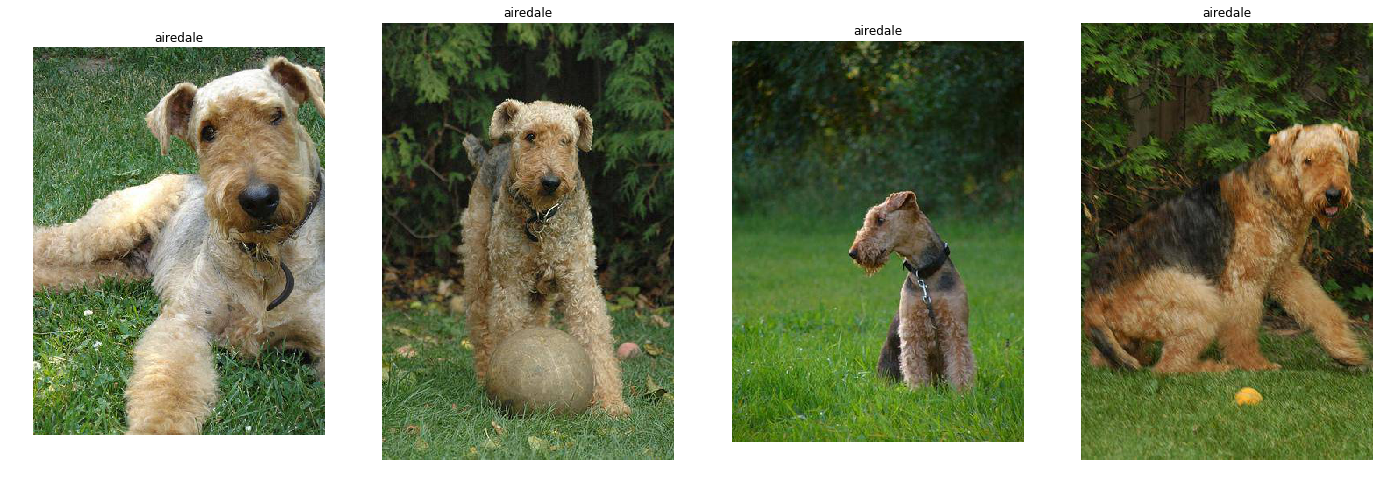

In [88]:
# create random number image to compare
image_wanted = random.randint(0, len(feature_list))

# query feature list for the image
query_vec = feature_list[image_wanted] 
distances, indices = neighbors.kneighbors(query_vec[None])

# plot the image itself and its three nearest neighbors
fig = plt.figure()
for i in range(4):
    label = [folder_list[indices[0][i]]]
    label_cleaned = [lab.replace(".jpg","") for lab in label]
    final_label = dog_labels[dog_labels['id']==label_cleaned[0]]['breed'].values[0]
    final_label = [lab.replace("_", " ") for lab in final_label]
    final_label = "".join(final_label)
    
    plot = plt.subplot(1, 4, i+1)
    plt.imshow(images_database[indices[0][i]])
    plt.axis('off')
    plot.set_title(final_label)

# sets image size so that they fit horizontally in a row
fig.set_size_inches(np.array(fig.get_size_inches()) * 4)
plt.show()

In [151]:
import pickle

with open('/Users/l1nda/documents/tavtech/week-2/dog-breeds/dogs_features_dict.pickle', 'rb') as f:
    data = pickle.load(f, encoding="latin1")

In [152]:
list(data.values())[0] # 2048 (dictionary doesn't have learning)

array([ 0.51062441,  0.0189979 ,  1.16739643, ...,  0.10154804,
        0.70325857,  0.42544618], dtype=float32)

In [153]:
list(data.keys())[0]

'91c25bb4539f68d68c7a23b8aa5d04b9.jpg'

In [154]:
values_array = list(data.values())
values_array

[array([ 0.51062441,  0.0189979 ,  1.16739643, ...,  0.10154804,
         0.70325857,  0.42544618], dtype=float32),
 array([ 1.45381832,  0.18097167,  2.3996253 , ...,  0.42805558,
         0.83234715,  0.        ], dtype=float32),
 array([ 0.33146551,  0.46116507,  0.06333732, ...,  0.17661247,
         0.27429494,  0.09579827], dtype=float32),
 array([ 1.12626684,  0.2085349 ,  0.09507709, ...,  0.16603974,
         0.17696233,  0.12911525], dtype=float32),
 array([  1.54863659e-03,   1.37639290e-04,   1.18550330e-01, ...,
          2.16833043e+00,   8.59188318e-01,   7.42965221e-01], dtype=float32),
 array([ 0.0364682 ,  0.75589925,  0.13517617, ...,  0.49142253,
         1.72965455,  0.67018253], dtype=float32),
 array([ 0.33583423,  0.02026475,  0.33415067, ...,  5.73878956,
         1.26396096,  0.16322704], dtype=float32),
 array([ 1.18990445,  0.14765064,  1.2502749 , ...,  0.0588301 ,
         0.11084675,  0.8628909 ], dtype=float32),
 array([ 0.69306207,  0.01255999,  2.40167

In [131]:
keys_array = list(data.keys())
keys_array

['91c25bb4539f68d68c7a23b8aa5d04b9.jpg',
 'dd27b4e1da87a6db84d1aa08f908c95d.jpg',
 '2456919fabd59db9456db5ee3a4b09bf.jpg',
 'aedc70a30016c85485369ea541058b2e.jpg',
 '9034ce4ee16750acd935da10c4eb1fa5.jpg',
 '2d879c2cde4587ac5bac5fcfdd0edadb.jpg',
 'b8dcf30dd6d0b661fbdc892c8047e179.jpg',
 '904af4de88a7146b714dac3475bf5ca9.jpg',
 'f5379f2502e90983e6361d4acdf0a56e.jpg',
 '5696a7947fc7e1e5aeafd4541d7bdc08.jpg',
 '8ea40cd8c90ff5e7d388b6712b955aa4.jpg',
 'f1f03709a6fb351e6255cabc277c5fc4.jpg',
 '4b7183fd8feb6c6e80eb62b9e6be55d1.jpg',
 '3b3ab97d636033d061d1fa2e18118f20.jpg',
 'caf49640a8436f3ed39c56b1c5e447db.jpg',
 '9bd01fec0fe84bf86b25219968808abc.jpg',
 'a3929452e7341352c0263072c15f37ea.jpg',
 'c21ebf600c0136815b16143e205638ff.jpg',
 '65cfb85a00cf1ad2424c70656e9d3dc6.jpg',
 '73cc3c43334e3d658ced97c70ba303cb.jpg',
 '2b76c878c08197a6702271f5bb7c32b5.jpg',
 '1b8ed338ec992b0f951a165dd4d53336.jpg',
 '987370a40fea9e37765009a6592823be.jpg',
 '7255557ff8ddf8da70e1efb260830eda.jpg',
 '6740ace5dc5638

In [110]:
# get the 3 nearest neighbors (as 0 is the image itself)
neighbors_pickle = NearestNeighbors(n_neighbors=4)

# "train data" (organizes NN data to make querying faster)
neighbors_pickle.fit(values_array)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=4, p=2, radius=1.0)

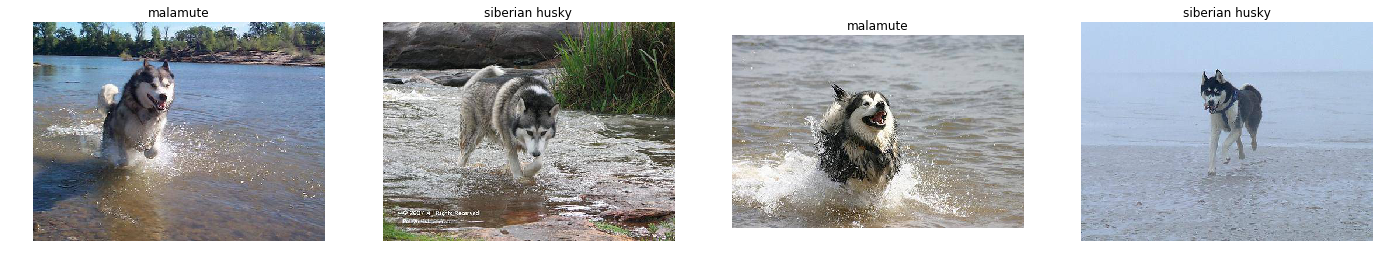

In [150]:
# create random number image to compare
image_wanted_p = random.randint(0, len(values_array))

# query feature list for the image
query_vec_p = values_array[image_wanted_p] 
distances_p, indices_p = neighbors.kneighbors(query_vec_p[None])

# plot the image itself and its three nearest neighbors
fig_p = plt.figure()
for i in range(4):
    image_title = keys_array[indices_p[0][i]]
    image_key = folder_list.index(image_title)
    
    
    label_p = keys_array[indices_p[0][i]]
    label_cleaned_p = [label_p.replace(".jpg","")]
    final_label_p = dog_labels[dog_labels['id']==label_cleaned_p[0]]['breed'].values[0]
    final_label_p = [lab.replace("_", " ") for lab in final_label_p]
    final_label_p = "".join(final_label_p)
    
    
    
    plot = plt.subplot(1, 4, i+1)
    plt.imshow(images_database[image_key])
    plt.axis('off')
    plot.set_title(final_label_p)

# sets image size so that they fit horizontally in a row
fig_p.set_size_inches(np.array(fig_p.get_size_inches()) * 4)
plt.show()